In [1]:
import numpy as np
import sys
sys.path.append("..") 
import cab
import matplotlib.pyplot as plt

In [4]:
kbyh,Tfn= np.loadtxt('cambTf_Om0.231_Ol0.724_Ob0.045_h0.700_ns0.961_z0.dat',usecols=[0,1],unpack = True)
cab1 = cab.cosmology(kbyh=kbyh,Tfn=Tfn)
m = np.logspace(10,14,10)
nu0 = cab1.PeakHeight(m,kbyh,Tfn,z=0)
nu1 = cab1.PeakHeight(m,kbyh,Tfn,z=1)
t10_z0 = cab1.T10(m,kbyh,Tfn,0)
t10_z1 = cab1.T10(m,kbyh,Tfn,1)


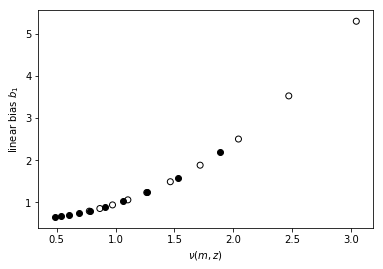

In [5]:
plt.scatter(nu0,t10_z0,color='k')
plt.scatter(nu1,t10_z1,color='k',facecolors='none')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.show()